In [1]:
import os 
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import json
import requests
from folium_jsbutton import JsButton






In [2]:
def Marker(markers, m):
    
    for i in range (len(markers)):
        marker = markers[i]
        folium.Marker(
                    location=[marker[0], marker[1]], # coordinates for the marker (Earth Lab at CU Boulder)
                    popup=marker[2], # pop-up label for the marker
                    #tooltip ='hello',
                    icon=folium.Icon(color=marker[3])
                    ).add_to(m)

In [3]:
def create_html(name):
    html=f"""
        <h1> {name}</h1>
        <img src= "https://th.bing.com/th/id/OIP.mbBEbzuRMttCVk4AyTzIxwHaD8?pid=ImgDet&rs=1" width="250" height="250" align = "right">
        &thinsp;
        <p><B><u>Charkteristika:</u></B></p>
        <ul>
            <li><B>Größe</B>: 100 m²</li>
            &thinsp;
            <li><B><a href="https://www.python-graph-gallery.com">ÖPNV-Anbindung</a></B>: S3, S4, Bus</li>
            &thinsp;
            <li><B>Adresse</B>:</li>
            &thinsp;
            <li><B>Höchstparkdauer</B></li>&thinsp;
            <li><B>Stellplatz</B></li>&thinsp;
            <li><B>Besonderheiten:</B></li>&thinsp;
            <li><B>Parkpreise</B>: kostenlos vs. Preis/pro Stunde</li>
        </ul>
        &thinsp;
        <p><B><u>Prognose:</u></B></p>
        <ul> 
            <li> <B>Mo-Fr</B> Morgens <font color = red>&emsp; voll </font></li>&thinsp;
            <li> <B>Mo-Fr</B> Mittags <font color = green>&emsp; leer </font></li>&thinsp;
            <li> <B>Mo-Fr</B> Abends<font color = orange>&emsp; mittel </font></li>&thinsp;
            <li> <B>Sa-So</B> Morgens</li>&thinsp;
            <li> <B>Sa-So</B> Mittags</li>&thinsp;
            <li> <B>Sa-So</B> Abends</li>&thinsp;
        </ul>
        </p>
        <body><py-script output="plot">
    </py-script></body>
        
        """
    iframe = folium.IFrame(html=html, width=700, height=700)
    popup = folium.Popup(iframe, max_width=7000)
    return popup

In [4]:
def create_Einzugsgebiete(gebiete,cluster):
    
    for gebiet in gebiete:
        circle = folium.vector_layers.Circle(location=[gebiet[0], gebiet[1]], radius=gebiet[2],color="#3186cc",
                                            fill=True,
                                            fill_color="#3186cc")
        circle.add_to(cluster)
        

In [5]:
#Buttontry
#https://www.bing.com/videos/search?q=how+can+i+link+a+button+to+another+page+folium&docid=607994660414294056&mid=A1D96BDABE2590FE108AA1D96BDABE2590FE108A&view=detail&FORM=VIRE

def create_Button( function):
    return JsButton(title='<i class="fas fa-crosshairs"></i>',function= function) 

In [6]:
# erstellen der Karte
m = folium.Map(location=[51.5, 10.0], zoom_start=6.47)

# erstellen & visualizieren der P&R Standorte
markers = [[48.13641, 11.57754, create_html("München"),"red"],[53.55334, 9.99247, create_html("Hamburg"),"red"], [50.11208, 8.68341, create_html("Frankfurt"),"green"] ]
Marker(markers,m)

# erstellen & visualisieren der Einzugsgebiete
einzugsgebiete = MarkerCluster(name ='Einzugsgebiete', show = False).add_to(m)
gebiete = [[48.13641, 11.57754,100000],[53.55334, 9.99247,10000],[50.11208, 8.68341,5000]]
create_Einzugsgebiete(gebiete,einzugsgebiete)

# Butto für die Angabe des Standortes
folium.plugins.LocateControl().add_to(m)

# Button für die Suche
folium.plugins.Search(layer = einzugsgebiete,position = 'topright').add_to(m)

folium.LayerControl().add_to(m)

#Button hinzufügen 
function = """
    function btnClicked() {
        location.href='http://www.example.com';
   }
   """
button = create_Button(function).add_to(m)


#JsButton(
#    title='<i class="fas fa-crosshairs"></i>',function="""
#    function btnClicked() {
#        location.href='http://www.example.com';
#    }
#    """).add_to(m)



m.save("P&R_Karte.html")
m

In [30]:
m = folium.Map(location=[51.5, 10.0], zoom_start=6.47)

# Marker für den Standort in München 
folium.Marker(
    location=[48.13641, 11.57754], # coordinates for the marker (Earth Lab at CU Boulder)
    popup='München', # pop-up label for the marker
    #tooltip ='hello',
    icon=folium.Icon(color="red")
).add_to(m)

#

merc = os.path.join("Screenshot_Clockwise.png")

html=f"""
        <h1> {'Hamburg'}</h1>
        <p>Charkteristika:</p>
        <ul>
            <li>Größe: 100 m²</li>
            <li>Anschluss: S3, S4, Bus</li>
        </ul>
        </p>
        <p><img src= "https://th.bing.com/th/id/OIP.mbBEbzuRMttCVk4AyTzIxwHaD8?pid=ImgDet&rs=1" width="368" height="383"></p>
        <body><py-script output="plot">
      import matplotlib.pyplot as plt
      import numpy as np
      x = np.random.randn(1000)
      y = np.random.randn(1000)
      fig, ax = plt.subplots()
      ax.scatter(x, y)
      fig
    </py-script></body>
        <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p>
        """
iframe = folium.IFrame(html=html, width=500, height=500)
popup = folium.Popup(iframe, max_width=7000)





#Marker für den Standort in München 
folium.Marker(
    location=[50.11208, 8.68341], # coordinates for the marker (Earth Lab at CU Boulder)
    popup=popup, # pop-up label for the marker
    #tooltip ='hello',
    icon=folium.Icon(color="green")
).add_to(m)


#Marker für den Standort in München 
folium.Marker(
    location=[53.55334, 9.99247], # coordinates for the marker (Earth Lab at CU Boulder)
    popup=folium.Popup(iframe, max_width=7000), # pop-up label for the marker
    #tooltip ='hello',
    icon=folium.Icon(color="red")
).add_to(m)





# Standort
standort1 =folium.Marker(
    location=[51.0, 9.0], # coordinates for the marker (Earth Lab at CU Boulder)
    #popup=', # pop-up label for the marker
    tooltip ='Mein Standort'
)




#m.fit_bounds([[50.0, 8.0], [52.0, 10.0]])
folium.vector_layers.Circle(location=[40.693943, -73.985880], radius=10000,color="#3186cc",
    fill=True,
    fill_color="#3186cc")



circle = folium.vector_layers.Circle(location=[51.0, 9.0], radius=10000,color="#3186cc",
    fill=True,
    fill_color="#3186cc")

circle1 = folium.vector_layers.Circle(location=[52.0, 10.0], radius=10000,color="#3186cc",
    fill=True,
    fill_color="#3186cc")


folium.plugins.LocateControl().add_to(m)



einzugsgebiete = MarkerCluster(name ='Einzugsgebiete', show = False).add_to(m)
standort = MarkerCluster(name = 'Mein Standort', show = False).add_to(m)
standort1.add_to(standort)
circle.add_to(einzugsgebiete)
circle1.add_to(einzugsgebiete)
folium.plugins.Search(layer = einzugsgebiete,position = 'topright').add_to(m)
folium.LayerControl().add_to(m)



m.save("index.html")
m





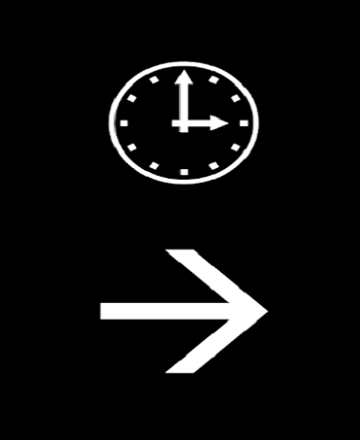

In [7]:
m = folium.Map([37, 0], zoom_start=1, tiles="stamentoner")
merc = os.path.join("Screenshot_Clockwise.png")



if not os.path.isfile(merc):
    print(f"Could not find {merc}")
else:
    img = folium.raster_layers.ImageOverlay(
        name="Mercator projection SW",
        image=merc,
        bounds=[[-82, -180], [82, 180]],
        opacity=0.6,
        interactive=True,
        cross_origin=True,
        zindex=1,
    )

iframe = folium.IFrame(merc, width=500, height=500)
popup = folium.Popup(iframe,max_width = 2650)
    
marker = folium.Marker(
    location=[53.55334, 9.99247], # coordinates for the marker (Earth Lab at CU Boulder)
    popup=popup, # pop-up label for the marker
    #tooltip ='hello',
    icon=folium.Icon(color="red")
).add_to(m)
    
img.add_to(marker)

#img.add_to(m)
folium.LayerControl().add_to(m)

m

In [114]:
#IMPORTS 
import os 
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import json
import requests
#CODE 

m = folium.Map(location=[40.693943, -73.985880], tiles = 'Stamen Toner')
folium.Marker(
    location=[40.693943, -73.985880], # coordinates for the marker (Earth Lab at CU Boulder)
   popup= folium.Popup(max_width=450, html= "hi, ich bin di P+R", parse_html = True).add_child(
        folium.Vega(vis1, width=450, height=250)
    ),
    tooltip ='P+R Düsseldorf',
    icon=folium.Icon(color="red"),
    control_scale = True
).add_to(m)

m.fit_bounds([[40.0, -74.0], [41.0, -73.0]])

#blue circle 
circle = folium.vector_layers.Circle(location=[40.693943, -73.985880], radius=10000,color="#3186cc",
    fill=True,
    fill_color="#3186cc")

#interactive
marker_cluster = MarkerCluster().add_to(m)
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.LayerControl().add_to(m)
circle.add_to(marker_cluster)

#Ansicht wechseln 


m.save("index.html")
m
#DIAGRAMME 



In [113]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
vis1 = json.loads(requests.get(f"{url}/vis1.json").text)
vis2 = json.loads(requests.get(f"{url}/vis2.json").text)
vis3 = json.loads(requests.get(f"{url}/vis3.json").text)


m = folium.Map(location=[46.3014, -123.7390], zoom_start=7, tiles="Stamen Terrain")

folium.Marker(
    location=[47.3489, -124.708],
    popup=folium.Popup(max_width=450).add_child(
        folium.Vega(vis1, width=450, height=250)
    ),
).add_to(m)

folium.Marker(
    location=[44.639, -124.5339],
    popup=folium.Popup(max_width=450).add_child(
        folium.Vega(vis2, width=450, height=250)
    ),
).add_to(m)

folium.Marker(
    location=[46.216, -124.1280],
    popup=folium.Popup(max_width=450).add_child(
        folium.Vega(vis3, width=450, height=250)
    ),
).add_to(m)


m


In [ ]:
# wollen wir einen Tooltip machen?
# sollen wir Kreise machen, wo drinnen steht, in einer weit entfernten Ansicht steht, wie viele in dem bereich sind